In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option("display.float_format", lambda x: '%.5f' % x)

In [2]:
df = pd.read_csv("house_prices_data.csv")

In [3]:
df.shape

(21613, 21)

In [10]:
pp.ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

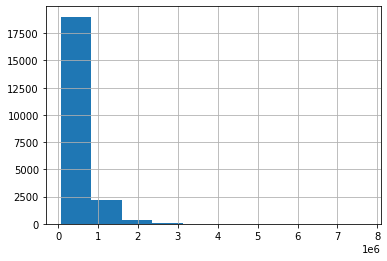

In [4]:
df['price'].hist()

In [5]:
df['yr_renovated'].value_counts(normalize = True) # apparantly the data was collected later, na's handled as 0

0      0.95771
2014   0.00421
2013   0.00171
2003   0.00167
2005   0.00162
2007   0.00162
2000   0.00162
2004   0.00120
1990   0.00116
2006   0.00111
2002   0.00102
2009   0.00102
1989   0.00102
1991   0.00093
1998   0.00088
2001   0.00088
1994   0.00088
1993   0.00088
1987   0.00083
2010   0.00083
2008   0.00083
1983   0.00083
1984   0.00083
1985   0.00079
1999   0.00079
1992   0.00079
1986   0.00079
2015   0.00074
1995   0.00074
1988   0.00069
1996   0.00069
1997   0.00069
2011   0.00060
2012   0.00051
1980   0.00051
1982   0.00051
1979   0.00046
1970   0.00042
1977   0.00037
1968   0.00037
1978   0.00028
1975   0.00028
1973   0.00023
1965   0.00023
1981   0.00023
1964   0.00023
1958   0.00023
1960   0.00019
1972   0.00019
1963   0.00019
1969   0.00019
1976   0.00014
1974   0.00014
1953   0.00014
1955   0.00014
1956   0.00014
1945   0.00014
1957   0.00014
1950   0.00009
1962   0.00009
1940   0.00009
1946   0.00009
1971   0.00009
1967   0.00009
1934   0.00005
1951   0.00005
1959   0.0

In [6]:
df['view'].value_counts(normalize = True) # similar to 'yr_renovated;

0   0.90173
2   0.04456
3   0.02360
1   0.01536
4   0.01476
Name: view, dtype: float64

In [4]:
# date extraction
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

In [5]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [6]:
df = df.drop('date', axis = 1)

In [7]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,premium,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
0,7129300520,221900,3,1.00000,1180,5650,1.00000,0,0,3,0,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650,13,10,2014
1,6414100192,538000,3,2.25000,2570,7242,2.00000,0,0,3,0,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639,9,12,2014
2,5631500400,180000,2,1.00000,770,10000,1.00000,0,0,3,0,770,0,1933,0,98028,47.73790,-122.23300,2720,8062,25,2,2015
3,2487200875,604000,4,3.00000,1960,5000,1.00000,0,0,5,0,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000,9,12,2014
4,1954400510,510000,3,2.00000,1680,8080,1.00000,0,0,3,0,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503,18,2,2015


In [8]:
df.mean(axis=0)

id              4580301520.86499
price               540088.14177
bedrooms                 3.37084
bathrooms                2.11476
sqft_living           2079.89974
sqft_lot             15106.96757
floors                   1.49431
waterfront               0.00754
view                     0.23430
condition                3.40943
premium                  0.07570
sqft_above            1788.39069
sqft_basement          291.50905
yr_built              1971.00514
yr_renovated            84.40226
zipcode              98077.93980
lat                     47.56005
long                  -122.21390
sqft_living15         1986.55249
sqft_lot15           12768.45565
day                     15.68820
month                    6.57442
year                  2014.32295
dtype: float64

### Normalising the columns

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
min_max_scaler = MinMaxScaler()

In [11]:
# subtract mean and divide over standard deviation
normalized_df = (df - df.mean()) / df.std()

In [12]:
normalized_via_scaler = pd.DataFrame(min_max_scaler.fit_transform(df))

In [13]:
normalized_via_scaler.columns = df.columns

*normalized_df* and *normalized_via_scaler* are identical

### Feature removal: low predictability features: zipcode

In [14]:
normalized_df = normalized_df.drop(['zipcode', 'id'], axis = 1)

### Train/test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    normalized_df.drop("price", axis = 1) , normalized_df.price, test_size = 0.2, shuffle = True
)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17290, 20), (17290,), (4323, 20), (4323,))

## Modelling

In [27]:
from sklearn.linear_model import LinearRegression

In [19]:
lin_reg = LinearRegression()

In [20]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

### Benchmarking

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [24]:
print("Sklearn lin reg baseline train: {:.4f}".format(rmse(y_train, y_train_pred)))
print("Sklearn lin reg baseline test: {:.4f}".format(rmse(y_test, y_test_pred)))

Sklearn lin reg baseline train: 0.5678
Sklearn lin reg baseline test: 0.5123


In [25]:
lin_reg.coef_

array([-0.08975212,  0.10974958,  0.25561707,  0.00865437,  0.02777391,
        0.1384319 ,  0.1150037 ,  0.06376572,  0.19098603,  0.23737689,
        0.08631192, -0.13122794,  0.04333049,  0.23450679, -0.06430203,
        0.09645986, -0.03536547, -0.01049841,  0.00288135,  0.03911536])

## Lin Reg from scratch

In [26]:
class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1000):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]

        return self

    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones(
                (n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params

In [29]:
my_lin_reg = LinearRegression(X_train, y_train)

In [30]:
my_lin_reg.fit()

In [31]:
y_pred = my_lin_reg.predict(X_train)

In [32]:
print("Sklearn lin reg baseline: {:.4f}".format(rmse(y_train, y_pred)))

Sklearn lin reg baseline: 0.5522


In [33]:
y_pred = my_lin_reg.predict(X_test)

In [34]:
print("Sklearn lin reg baseline: {:.4f}".format(rmse(y_test, y_pred)))

Sklearn lin reg baseline: 0.5745


### Recursive feature elemination

In [45]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=lin_reg, n_features_to_select=15)

In [46]:
rfe.fit(X_train, y_train)

rfe_pred = rfe.predict(X_test)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [49]:
print("Sklearn lin reg baseline: {:.4f}".format(rmse(y_test, rfe_pred)))

Sklearn lin reg baseline: 0.6184


## Polynomial regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_3 = PolynomialFeatures(degree=3, include_bias=False)

In [33]:
X_train_poly_2 = poly_2.fit_transform(X_train)
X_test_poly_2 = poly_2.fit_transform(X_test)

In [34]:
X_train_poly_3 = poly_3.fit_transform(X_train)
X_test_poly_3 = poly_3.fit_transform(X_test)

In [35]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_2, y_train)

poly_train_pred = poly_reg.predict(X_train_poly_2)
poly_test_pred = poly_reg.predict(X_test_poly_2)

print("Poly baseline degree=2 train: {:.4f}".format(rmse(y_train, poly_train_pred)))
print("Poly baseline degree=2 test: {:.4f}".format(rmse(y_test, poly_test_pred)))

Poly baseline degree=2 train: 0.4439
Poly baseline degree=2 test: 0.4589


Apparent improval over the baseline (0.5745)

In [36]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_3, y_train)

poly_train_pred = poly_reg.predict(X_train_poly_3)
poly_test_pred = poly_reg.predict(X_test_poly_3)

print("Poly baseline degree=3 train: {:.4f}".format(rmse(y_train, poly_train_pred)))
print("Poly baseline degree=3 test: {:.4f}".format(rmse(y_test, poly_test_pred)))

Poly baseline degree=3 train: 0.3287
Poly baseline degree=3 test: 0.5984


Obvious overfitting begins at polydegree 3

## SVC

In [37]:
from sklearn.svm import SVR

In [38]:
svr = SVR(kernel="linear")

In [68]:
svr.fit(X_train, y_train)

y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

print("SVC linear kernel train: {:.4f}".format(rmse(y_train, y_train_pred)))
print("SVC linear kernel test: {:.4f}".format(rmse(y_test, y_test_pred)))

SVC linear kernel train: 0.5786
SVC linear kernel test: 0.6133


Weaker performance

## Decision Tree Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
dtr = DecisionTreeRegressor(max_depth=5)

Normalizing features for a tree model is not necessary, as it is not impacted by high predictor variance.
We will still use normalized data nonetheless.

In [97]:
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)

print("DT regressor train: {:.4f}".format(rmse(y_train, y_train_pred)))
print("DT regressor test: {:.4f}".format(rmse(y_test, y_test_pred)))

DT regressor train: 0.4992
DT regressor test: 0.5729


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rfr = RandomForestRegressor(max_depth=6, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

In [41]:
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

print("RF regressor train: {:.4f}".format(rmse(y_train, y_train_pred)))
print("RF regressor test: {:.4f}".format(rmse(y_test, y_test_pred)))

RF regressor train: 0.4090
RF regressor test: 0.4323


* Much more smooth (Quadratic regression showed 0.4439, 0.4589)

## LightGBM Classifier

In [42]:
import lightgbm as lgbm

In [43]:
lgb_model = lgbm.LGBMRegressor(
    n_estimators=300, 
    colsample_bytree=0.8, 
    subsample=0.9,
    max_depth=5,
    learning_rate=0.015, 
    subsample_for_bin=300000,
    num_leaves=23
)

In [44]:
lgb_model.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.015, max_depth=5,
              n_estimators=300, num_leaves=23, subsample=0.9,
              subsample_for_bin=300000)

In [45]:
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)

print("LGBM regressor train: {:.4f}".format(rmse(y_train, y_train_pred)))
print("LGBM regressor test: {:.4f}".format(rmse(y_test, y_test_pred)))

LGBM regressor train: 0.3242
LGBM regressor test: 0.3600


Best result so far. A lot of tuning, tweaking, and ensembling can still be done.